<a href="https://colab.research.google.com/github/eliekawasfr/Chicago_Crimes_2001_to_4june2024/blob/main/Project_3_Part_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Elie Kawas
Date Created: 5th June 2024

# import and impute data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 42
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)


# import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from scipy.signal import find_peaks

In [3]:
import time

start_time = time.time()

In [4]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/4- Visualizations and time series/Project/Crimes_-_2001_to_Present_20240604.csv'
df = pd.read_csv(folder_path)
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"


In [5]:
df.shape

(8074782, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8074782 entries, 0 to 8074781
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [7]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')





In [8]:
df.isna().sum().sum()

1685914

In [9]:
df = df.fillna(method='ffill')

df.isna().sum().sum()

5

In [10]:
df = df.fillna(method='bfill')
df.isna().sum().sum()

0

In [11]:
og_df = df.copy()

In [12]:
df = df.set_index("Date")
df = df.sort_index()
df.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,9755248,HX403559,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1153385.0,1898475.0,2001,08/17/2015 03:03:40 PM,41.877259,-87.712279,"(41.877258758, -87.712278516)"
2001-01-01,1520951,G268785,080XX S CHAMPLAIN AV,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,631,6.0,14.0,76.0,06,1182001.0,1851822.0,2001,08/17/2015 03:03:40 PM,41.748623,-87.608654,"(41.748623027, -87.608654109)"
2001-01-01,9747360,HX397217,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1195184.0,1836385.0,2001,08/17/2015 03:03:40 PM,41.705948,-87.560855,"(41.705947689, -87.560855356)"


In [13]:
end_time = time.time()
duration = end_time - start_time
print("Duration:", duration/60)


Duration: 2.0080159425735475


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8074782 entries, 2001-01-01 00:00:00 to 2024-05-27 00:00:00
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
dtypes: bool(2), float64(7), int64(3), object(9)


# Speculations and basic visualizations

## 1 - Comparing Police Districts, Highest crimes count vs Lowest crimes count

In [15]:
crime_2022 = df[df['Year'] == 2022]
crime_2022.head(3)


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,12976975,JG145447,076XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,611,6.0,17.0,71.0,26,1104700.0,1933741.0,2022,02/09/2023 03:41:47 PM,41.974862,-87.890372,"(41.974861952, -87.890372151)"
2022-01-01,12691932,JF233522,024XX E 106TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,True,434,4.0,7.0,51.0,07,1194409.0,1835217.0,2022,01/03/2023 03:40:27 PM,41.702762,-87.563732,"(41.70276162, -87.56373152)"
2022-01-01,12589134,JF108209,009XX W WRIGHTWOOD AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,APARTMENT,False,False,1935,19.0,43.0,7.0,11,1169722.0,1917469.0,2022,01/03/2023 03:40:27 PM,41.929039,-87.651740,"(41.929039384, -87.651739711)"


In [16]:
district_max = df['District'].value_counts().idxmax()
district_max_count = df['District'].value_counts().max()

In [17]:
district_min = df['District'].value_counts().idxmin()
district_min_count = df['District'].value_counts().min()

In [18]:
print(f"The district with the most crimes in 2022 is {district_max} with {district_max_count} crimes.")
print(f"The district with the least crimes in 2022 is {district_min} with {district_min_count} crimes.")

The district with the most crimes in 2022 is 8.0 with 542139 crimes.
The district with the least crimes in 2022 is 21.0 with 4 crimes.


## 2 -  Crimes Across the Years

In [19]:
crimes_years_count = df['Year'].value_counts()

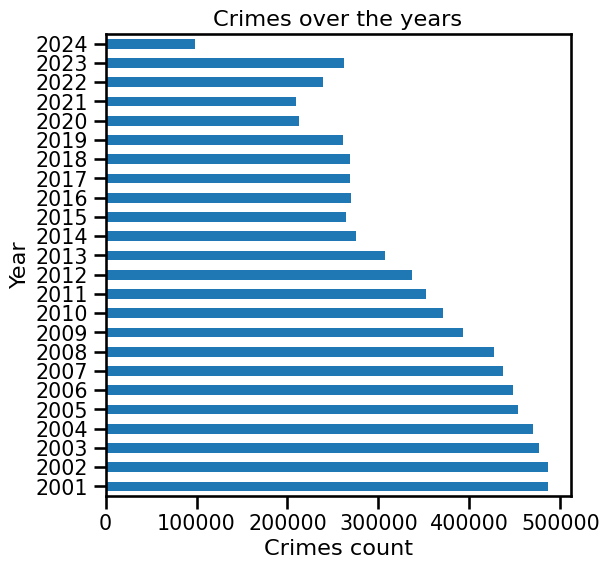

In [20]:
ax = crimes_years_count.sort_index().plot(kind='barh',figsize=(6,6))
ax.set(title='Crimes over the years',xlabel='Crimes count',ylabel ='Year');

In [21]:
overall_trend = "increasing" if crimes_years_count.diff().sum() > 0 else "decreasing"
print(f"The total number of crimes is {overall_trend} across the years.")

The total number of crimes is decreasing across the years.


In [22]:
crime_type_count = df.groupby(['Year', 'Primary Type']).size()
crime_type_count

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31386
      BATTERY                              93466
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2024  ROBBERY                               3549
      SEX OFFENSE                            495
      STALKING                               164
      THEFT                                21635
      WEAPONS VIOLATION                     3139
Length: 751, dtype: int64

In [23]:
crime_type_count= crime_type_count.unstack(fill_value=0)
crime_type_count

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,1011,31386,93466,26014,1,1776,55862,36,13241,14950,1,934,667,0,406,279,933,1637,27555,50568,0,0,0,19,2265,6,29664,6026,9,2750,8,18441,2238,204,99281,4278
2002,1032,31523,94153,25623,0,1804,55941,33,13881,13737,0,971,658,0,361,337,829,1414,25121,51789,0,0,0,26,2595,5,32601,6408,8,2457,2,18523,2173,200,98334,4281
2003,955,29477,88380,25157,0,1569,55011,44,14807,13461,0,1088,604,0,409,364,705,1311,22749,54288,0,1,0,16,3047,2,31148,6214,6,2430,2,17332,2078,247,98876,4211
2004,778,28850,87136,24564,0,1534,53164,48,15913,13257,0,1122,455,0,531,349,482,985,22805,57060,0,0,0,13,3101,9,29533,7476,9,2495,1,15978,1805,215,95464,4298
2005,691,27067,83964,25503,0,1517,54548,42,16655,13592,0,1078,453,0,615,258,389,1005,22497,56234,0,0,0,19,2909,9,28028,6124,4,2730,2,16047,1817,192,85684,4106
2006,726,25945,80666,24324,0,1438,57124,49,14505,13609,0,1368,476,0,758,276,339,1135,21818,55813,0,0,0,17,2787,9,27101,7034,4,3068,7,15969,1575,186,86241,3821
2007,712,26313,79593,24858,0,1506,53749,54,13699,14174,0,1409,448,0,677,255,329,1170,18573,54454,0,0,0,12,2919,12,26863,6087,5,3315,1,15450,1529,213,85156,3554
2008,644,25448,75930,26218,0,1509,52843,56,12310,14935,0,1199,513,0,580,261,359,912,18881,46506,0,0,0,13,2667,12,26532,5141,4,3013,0,16703,1504,190,88437,3877
2009,616,22861,68460,26767,0,1394,47725,53,10851,13883,0,991,461,0,573,231,293,746,15482,43542,0,1,0,21,2634,7,25601,3940,10,3147,0,15981,1268,168,80975,4159


In [24]:
crime_change = crime_type_count.diff().sum()
crime_change

Primary Type
ARSON                                 -821.0
ASSAULT                             -22238.0
BATTERY                             -75560.0
BURGLARY                            -23135.0
CONCEALED CARRY LICENSE VIOLATION       63.0
CRIM SEXUAL ASSAULT                  -1776.0
CRIMINAL DAMAGE                     -44900.0
CRIMINAL SEXUAL ASSAULT                512.0
CRIMINAL TRESPASS                   -11361.0
DECEPTIVE PRACTICE                   -9180.0
DOMESTIC VIOLENCE                       -1.0
GAMBLING                              -927.0
HOMICIDE                              -475.0
HUMAN TRAFFICKING                        2.0
INTERFERENCE WITH PUBLIC OFFICER      -142.0
INTIMIDATION                          -219.0
KIDNAPPING                            -898.0
LIQUOR LAW VIOLATION                 -1556.0
MOTOR VEHICLE THEFT                 -18935.0
NARCOTICS                           -48231.0
NON - CRIMINAL                           0.0
NON-CRIMINAL                             1

---

**check which crime has a negative relationship with the change over the years**

---

In [25]:
crime_change * crimes_years_count.diff().sum()

Primary Type
ARSON                                3.192261e+08
ASSAULT                              8.646713e+09
BATTERY                              2.937969e+10
BURGLARY                             8.995490e+09
CONCEALED CARRY LICENSE VIOLATION   -2.449604e+07
CRIM SEXUAL ASSAULT                  6.905550e+08
CRIMINAL DAMAGE                      1.745829e+10
CRIMINAL SEXUAL ASSAULT             -1.990789e+08
CRIMINAL TRESPASS                    4.417452e+09
DECEPTIVE PRACTICE                   3.569423e+09
DOMESTIC VIOLENCE                    3.888260e+05
GAMBLING                             3.604417e+08
HOMICIDE                             1.846924e+08
HUMAN TRAFFICKING                   -7.776520e+05
INTERFERENCE WITH PUBLIC OFFICER     5.521329e+07
INTIMIDATION                         8.515289e+07
KIDNAPPING                           3.491657e+08
LIQUOR LAW VIOLATION                 6.050133e+08
MOTOR VEHICLE THEFT                  7.362420e+09
NARCOTICS                            

In [26]:
negative = crime_change > 0
negative_crimes = negative[negative == True]
negative_crimes

Primary Type
CONCEALED CARRY LICENSE VIOLATION    True
CRIMINAL SEXUAL ASSAULT              True
HUMAN TRAFFICKING                    True
NON-CRIMINAL                         True
OBSCENITY                            True
dtype: bool

In [27]:
abnormal_change_crimes = crime_change[negative_crimes.index]
abnormal_change_crimes

Primary Type
CONCEALED CARRY LICENSE VIOLATION     63.0
CRIMINAL SEXUAL ASSAULT              512.0
HUMAN TRAFFICKING                      2.0
NON-CRIMINAL                           1.0
OBSCENITY                              9.0
dtype: float64

In [28]:
print("Individual crimes with opposite trend to overall trend:")
for crime in abnormal_change_crimes.index:
    print(f"- {crime}")


Individual crimes with opposite trend to overall trend:
- CONCEALED CARRY LICENSE VIOLATION
- CRIMINAL SEXUAL ASSAULT
- HUMAN TRAFFICKING
- NON-CRIMINAL
- OBSCENITY


## 3- What cycles (seasonality) can you find in this data?

In [29]:
og_df.info()
og_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8074782 entries, 0 to 8074781
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,2007-08-25 09:22:18,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,1141387.0,1913179.0,2007,08/17/2015 03:03:40 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,25953,JE240540,2021-05-24 15:06:00,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,2021-06-26 09:24:00,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"


In [30]:
crimes_ts = df.pivot_table(index='Date', columns='Primary Type', aggfunc='size', fill_value=0)
crimes_ts.head(3)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,2,1,1,0,12,12,2,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,8,0,0,0,0,0,39,0,71,0
2001-01-01 00:01:00,0,0,1,1,0,9,7,0,0,18,0,0,0,0,0,0,0,0,4,0,0,0,0,0,36,0,4,0,0,0,0,0,13,0,49,0
2001-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
crimes_ts_month = crimes_ts.resample('M').sum()
crimes_ts_month.head(3)


Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67,2123,6527,1934,0,162,3966,4,1192,1398,1,44,42,0,36,18,75,101,2097,4714,0,0,0,2,247,1,2800,563,0,161,2,1396,218,26,7867,337
2001-02-28,57,2029,6042,1666,0,134,3665,1,1063,1163,0,37,27,0,27,24,57,109,1785,4369,0,0,0,1,153,0,2488,426,1,173,0,1159,149,13,6669,301
2001-03-31,93,2824,7662,1832,0,149,4618,5,1141,1313,0,55,37,0,22,22,72,147,2152,4862,0,0,0,2,195,0,2837,550,0,267,2,1399,184,17,7766,345


In [32]:
total_crime_count = crimes_ts_month.sum(axis=1)
total_crime_count.head()

Date
2001-01-31    38121
2001-02-28    33788
2001-03-31    40570
2001-04-30    40093
2001-05-31    41842
Freq: M, dtype: int64

In [33]:
total_crime_count['2014':'2016'].idxmax()

Timestamp('2014-07-31 00:00:00')

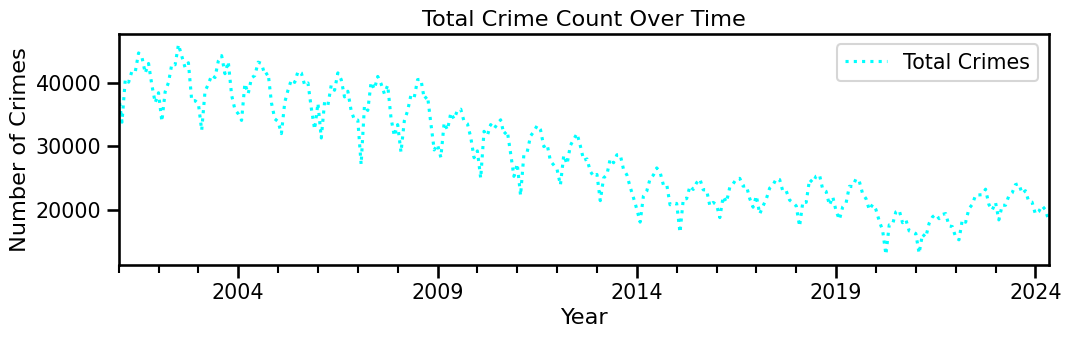

In [34]:
plt.figure(figsize=(12, 3))
total_crime_count.plot(linestyle=':', color='cyan', label='Total Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Total Crime Count Over Time')
plt.legend()
plt.show()

In [35]:
decomp_crime_count = tsa.seasonal_decompose(total_crime_count)

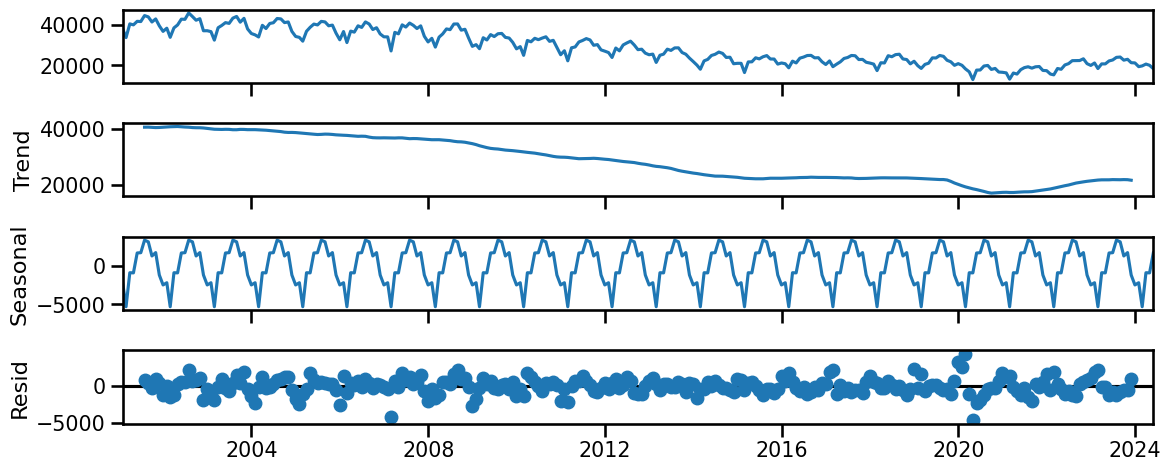

In [36]:
fig = decomp_crime_count.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

---

the Trend is decreasing overtime
there is a seasionality in the data that we can further explore

---

In [37]:
season14_16 = decomp_crime_count.seasonal['2014':'2016']
max_s = season14_16.max()
min_s = season14_16.min()
magnitude = max_s  - min_s
max_ids = season14_16.idxmax()
min_ids = season14_16.idxmin()

In [38]:
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for crimes');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax


In [39]:
peaks, props = find_peaks(season14_16, height=season14_16.max())
peak_dates = season14_16.index[peaks]
period = peak_dates[1] - peak_dates[0]

periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods


[Timedelta('365 days 00:00:00'), Timedelta('366 days 00:00:00')]

The highest crime count was 3366.27 over the norm at the date 2014-07-31 00:00:00,
 while the lowest was -5316.85 under the norm at the date 2014-02-28 00:00:00,
 which is represented in a magnitude of 8683.12 over a period of 153 days 00:00:00, 
 note that this data is represented by month and not by day


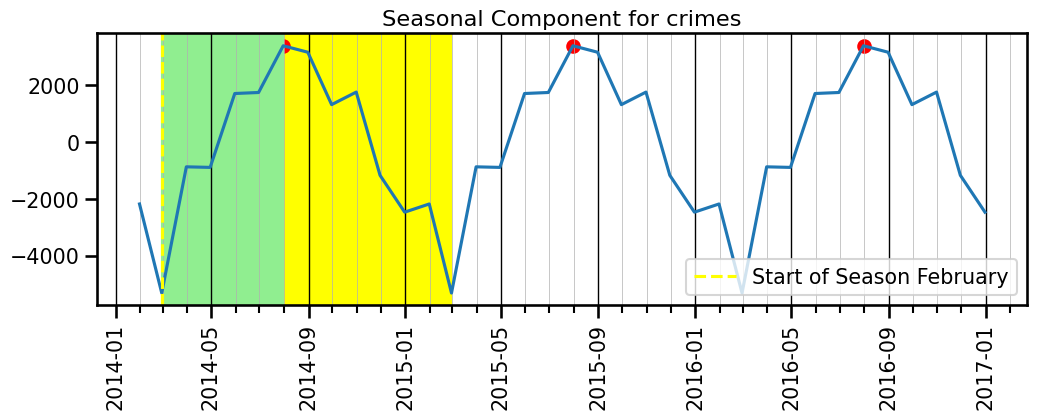

In [40]:
fig, ax = plot_seasonal(season14_16)
season_start = season14_16.idxmin()
ax.axvspan( season_start, season_start +period, color='yellow')
ax.axvline(season_start, color='yellow', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.scatter(peak_dates, props['peak_heights'], color='red')
ax.axvspan(season14_16.idxmin(),season14_16.idxmax(), color='lightgreen')
ax.legend();


print(f"The highest crime count was {max_s:.2f} over the norm at the date {max_ids},\n while the lowest was {min_s:.2f} under the norm at the date {min_ids},\n which is represented in a magnitude of {magnitude:.2f} over a period of {max_ids - min_ids}, \n note that this data is represented by month and not by day")